# Data Analysis



In [1]:
!pip install ace-tools


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Kayla\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

amazon = pd.read_csv("https://raw.githubusercontent.com/amanzanares410/ds4002-project1/refs/heads/main/DATA/amazon_clothing_reviews.csv")
print(amazon.shape)
amazon.head()


Matplotlib is building the font cache; this may take a moment.


(6525, 11)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


The data dimensions are 6525 x 11, so there are 6525 observations of 11
variables.



In [3]:
fashion_nova = pd.read_csv('https://raw.githubusercontent.com/amanzanares410/DS4002-Project1/refs/heads/main/DATA/fashionnova_reviews.csv')
print(fashion_nova.shape)
fashion_nova.head()

(131980, 9)


,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Champagne,/users/66c78240087b6269ffbcb5fb,US,1 review,2024-08-22T20:24:02.000Z,Rated 5 out of 5 stars,I love ordering from fashion nova,I love ordering from fashion nova. The clothes...,"August 22, 2024"
1,Vg customer,/users/6618fdb53d4198001210cbe7,VG,3 reviews,2024-08-21T05:43:11.000Z,Rated 5 out of 5 stars,Top tier content for fashion nova,Always amazing clothes and the fast shipping i...,"August 18, 2024"
2,Colleen Burgher,/users/64e9595206be1a001244ff73,US,3 reviews,2024-08-21T17:09:14.000Z,Rated 5 out of 5 stars,Prices and quality of products are…,Prices and quality of products are GREAT Would...,"August 21, 2024"
3,R.G.M,/users/66c58ad1c6ab36352a08f57a,US,1 review,2024-08-21T08:36:03.000Z,Rated 5 out of 5 stars,Great customer service,Great customer service. I was helped until the...,"August 20, 2024"
4,Rosalyn Cousar,/users/60ad4b6ef3788e001adbb8e3,US,5 reviews,2024-08-22T00:46:16.000Z,Rated 3 out of 5 stars,False advertising,Disappointing experience. You don’t live up to...,"August 21, 2024"


In [4]:
print(sum(amazon['Review Text'].isna()))
print(sum(amazon['Title'].isna()))
print(sum(amazon['Rating'].isna()))

print(sum(fashion_nova['Review Text'].isna()))
print(sum(fashion_nova['Review Title'].isna()))
print(sum(fashion_nova['Rating'].isna()))

229
1068
0
0
48
0


In [5]:
# cleaning: drop if missing review text, convert rating into int
amazon = amazon.dropna(subset=['Review Text'])

rating_column = fashion_nova['Rating'].str.extract(r'Rated (\d) out of 5 stars').astype(int)
fashion_nova['Rating'] = rating_column

In [6]:
print(sum(amazon['Review Text'].isna()))
print(sum(fashion_nova['Review Text'].isna()))

0
0


In [7]:
df = pd.DataFrame()
df['Fashion Nova_shipping'] = fashion_nova['Review Text'].str.count(r'\bshipping\b')
df['Amazon_shipping'] = amazon['Review Text'].str.count(r'\bshipping\b')
df['Fashion Nova_quality'] = fashion_nova['Review Text'].str.count(r'\bquality\b')
df['Amazon_quality'] = amazon['Review Text'].str.count(r'\bquality\b')

In [8]:
for column in df.columns:
  print(f"Counts for {column}:")
  print(df[column].value_counts())
  print("\n")


Counts for Fashion Nova_shipping:
Fashion Nova_shipping
0     124276
1       6466
2        921
3        215
4         56
5         27
6         10
7          5
8          2
10         1
9          1
Name: count, dtype: int64


Counts for Amazon_shipping:
Amazon_shipping
0.0    6282
1.0      14
Name: count, dtype: int64


Counts for Fashion Nova_quality:
Fashion Nova_quality
0    123654
1      8071
2       222
3        27
4         4
6         1
5         1
Name: count, dtype: int64


Counts for Amazon_quality:
Amazon_quality
0.0    5707
1.0     564
2.0      23
3.0       2
Name: count, dtype: int64




In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kayla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kayla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Kayla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [43]:
# defining stop words to remove insignificant words when tokenizing (splitting up) our review text
stop_words = set(stopwords.words('english'))
custom_stop_words = {}
stop_words.update(custom_stop_words)

def preprocess(text):
  tokens = word_tokenize(text.lower())
  tokens = [token for token in tokens if token.isalpha()]
  tokens = [token for token in tokens if token not in stop_words]
  return tokens

amazon['Processed_Reviews'] = amazon['Review Text'].apply(preprocess)
fashion_nova['Processed_Reviews'] = fashion_nova['Review Text'].apply(preprocess)


In [44]:
def categorize_review(text):
  shipping_keywords = ['shipping', 'delivery', 'shipment', 'deliver', 'time', 'packaging', 'box', 'late', 'early', 'fast', 'slow', 'arrived', 'delivered', 'received']
  quality_keywords = ['quality', 'fit', 'length', 'material', 'fabric', 'cheap', 'shape', 'style', 'clothing', 'made', 'size', 'thin']

  shipping = any(word in text for word in shipping_keywords)
  quality = any(word in text for word in quality_keywords)

  if shipping and quality:
    return 'Both'
  elif shipping:
    return 'Shipping'
  elif quality:
    return 'Quality'
  else:
    return 'Other'

amazon['Category'] = amazon['Processed_Reviews'].apply(categorize_review)
fashion_nova['Category'] = fashion_nova['Processed_Reviews'].apply(categorize_review)

In [45]:
category_comparison = pd.DataFrame({
    'Amazon': amazon['Category'].value_counts(),
    'Fashion Nova': fashion_nova['Category'].value_counts()
}).fillna(0)


print(category_comparison)

          Amazon  Fashion Nova
Category                      
Both         481          6825
Other       1549         90651
Quality     4091         17017
Shipping     175         17487


In [46]:
# print by percentage
category_percentage = category_comparison.div(category_comparison.sum(axis=0), axis=1) * 100
print(category_percentage)


             Amazon  Fashion Nova
Category                         
Both       7.639771      5.171238
Other     24.602922     68.685407
Quality   64.977764     12.893620
Shipping   2.779543     13.249735


In [47]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kayla\AppData\Roaming\nltk_data...


True

In [48]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)  # returns a dictionary {neg, neu, pos, compound}
    compound = sentiment_score['compound']  # grabs compound score, assesses how pos, neg, or neu a review is (from polarity_scores)
    if compound >= 0.05:
        return 'Good'
    elif compound <= -0.05:
        return 'Bad'
    else: # (-0.05, 0.05)
        return 'Neutral'
# amazon['Sentiment'] = amazon['Review Text'].apply(get_sentiment)
# fashion_nova['Sentiment'] = fashion_nova['Review Text'].apply(get_sentiment)

# apply to preprocessed reviews
amazon['Processed_Sentiment'] = amazon['Processed_Reviews'].apply(lambda tokens: get_sentiment(' '.join(tokens)))
fashion_nova['Processed_Sentiment'] = fashion_nova['Processed_Reviews'].apply(lambda tokens: get_sentiment(' '.join(tokens)))


In [49]:
print(amazon[['Review Text', 'Processed_Sentiment', 'Category']].head())


                                         Review Text Processed_Sentiment  \
0  Absolutely wonderful - silky and sexy and comf...                Good   
1  Love this dress!  it's sooo pretty.  i happene...                Good   
2  I had such high hopes for this dress and reall...                Good   
3  I love, love, love this jumpsuit. it's fun, fl...                Good   
4  This shirt is very flattering to all due to th...                Good   

   Category  
0     Other  
1   Quality  
2   Quality  
3  Shipping  
4   Quality  


In [50]:
amazon_sentiment_counts = amazon.groupby(['Category', 'Processed_Sentiment']).size().reset_index(name='Count')
fashion_nova_sentiment_counts = fashion_nova.groupby(['Category', 'Processed_Sentiment']).size().reset_index(name='Count')

print("Amazon Review Sentiment Counts by Category:")
amazon_sentiment_counts

Amazon Review Sentiment Counts by Category:


,Category,Processed_Sentiment,Count
0,Both,Bad,23
1,Both,Good,453
2,Both,Neutral,5
3,Other,Bad,44
4,Other,Good,1473
5,Other,Neutral,32
6,Quality,Bad,78
7,Quality,Good,3980
8,Quality,Neutral,33
9,Shipping,Bad,5


In [51]:
print("Fashion Nova Review Sentiment Counts by Category:")
fashion_nova_sentiment_counts

Fashion Nova Review Sentiment Counts by Category:


,Category,Processed_Sentiment,Count
0,Both,Bad,854
1,Both,Good,5682
2,Both,Neutral,289
3,Other,Bad,3981
4,Other,Good,42190
5,Other,Neutral,44480
6,Quality,Bad,915
7,Quality,Good,15219
8,Quality,Neutral,883
9,Shipping,Bad,3085


In [52]:
# calculate percentage of each sentiment within each category
def calculate_percentage(df):
    total_by_category = df.groupby('Category').size().reset_index(name='Total')
    sentiment_counts = df.groupby(['Category', 'Processed_Sentiment']).size().reset_index(name='Count')
    merged = sentiment_counts.merge(total_by_category, on='Category')
    merged['Percentage'] = (merged['Count'] / merged['Total']) * 100
    return merged[['Category', 'Processed_Sentiment', 'Count', 'Total', 'Percentage']]

amazon_percentages = calculate_percentage(amazon)
fashion_nova_percentages = calculate_percentage(fashion_nova)

print("Amazon Review Sentiment Percentages by Category:")
print(amazon_percentages)

print("\nFashion Nova Review Sentiment Percentages by Category:")
print(fashion_nova_percentages)


Amazon Review Sentiment Percentages by Category:
    Category Processed_Sentiment  Count  Total  Percentage
0       Both                 Bad     23    481    4.781705
1       Both                Good    453    481   94.178794
2       Both             Neutral      5    481    1.039501
3      Other                 Bad     44   1549    2.840542
4      Other                Good   1473   1549   95.093609
5      Other             Neutral     32   1549    2.065849
6    Quality                 Bad     78   4091    1.906624
7    Quality                Good   3980   4091   97.286727
8    Quality             Neutral     33   4091    0.806649
9   Shipping                 Bad      5    175    2.857143
10  Shipping                Good    167    175   95.428571
11  Shipping             Neutral      3    175    1.714286

Fashion Nova Review Sentiment Percentages by Category:
    Category Processed_Sentiment  Count  Total  Percentage
0       Both                 Bad    854   6825   12.512821
1       Bo

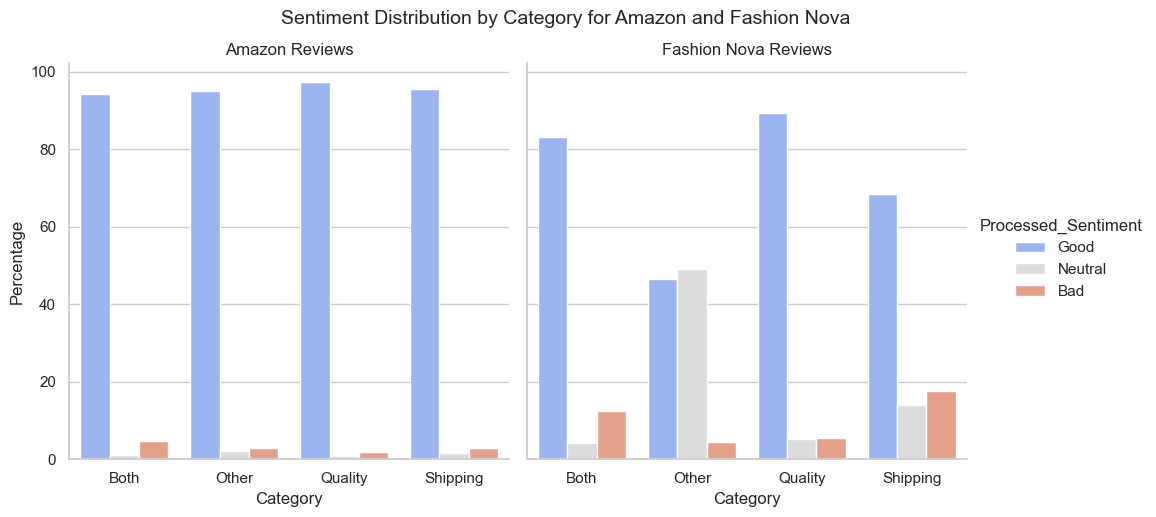

In [56]:
# distinguish between platforms
amazon_percentages['Platform'] = 'Amazon'
fashion_nova_percentages['Platform'] = 'Fashion Nova'

# combine both datasets
combined_percentages = pd.concat([amazon_percentages, fashion_nova_percentages], ignore_index=True, sort=False)

# combined percentages, not separated by brand
# sns.barplot(data=combined_percentages, x='Category', y='Percentage', hue='Processed_Sentiment', ci=None,
#             palette='coolwarm', hue_order=['Good', 'Neutral', 'Bad'],
#             dodge=True)

g = sns.catplot(data=combined_percentages, legend_out=True, x='Category', y='Percentage', hue='Processed_Sentiment',
                col='Platform', kind='bar', height=5, aspect=1, palette='coolwarm',
                hue_order=['Good', 'Neutral', 'Bad'])
g.set_axis_labels("Category", "Percentage")
g.set_titles("{col_name} Reviews")
g.fig.suptitle('Sentiment Distribution by Category for Amazon and Fashion Nova', y=1.03, fontsize=14)

plt.show()


C:\Users\Kayla\AppData\Local\Temp\ipykernel_39872\4209701481.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=category_df, x='Processed_Sentiment', y='Percentage', hue='Platform',


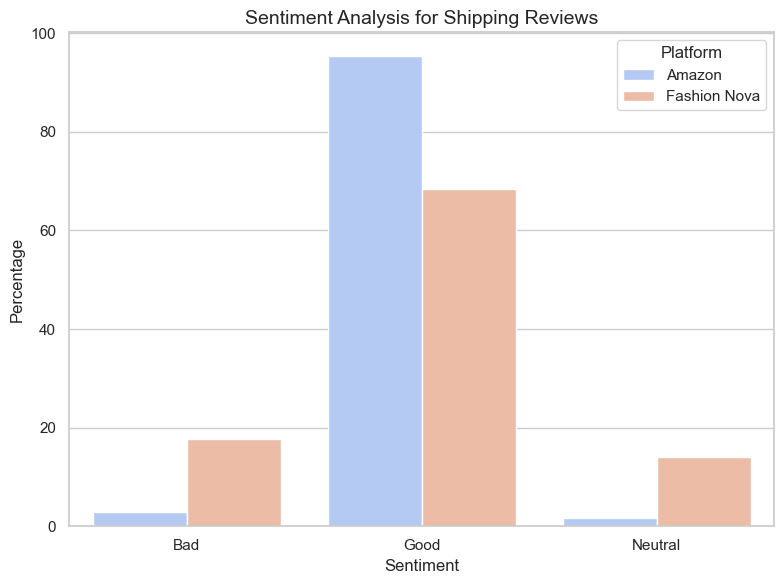

C:\Users\Kayla\AppData\Local\Temp\ipykernel_39872\4209701481.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=category_df, x='Processed_Sentiment', y='Percentage', hue='Platform',


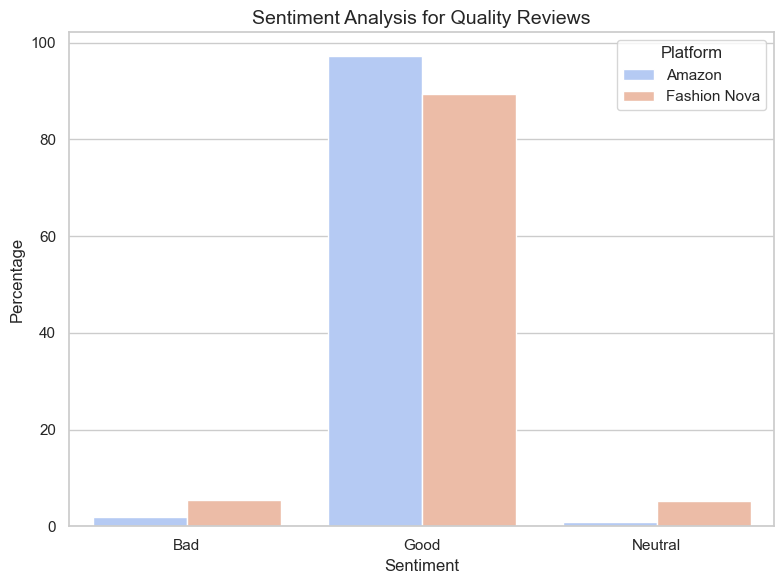

C:\Users\Kayla\AppData\Local\Temp\ipykernel_39872\4209701481.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=category_df, x='Processed_Sentiment', y='Percentage', hue='Platform',


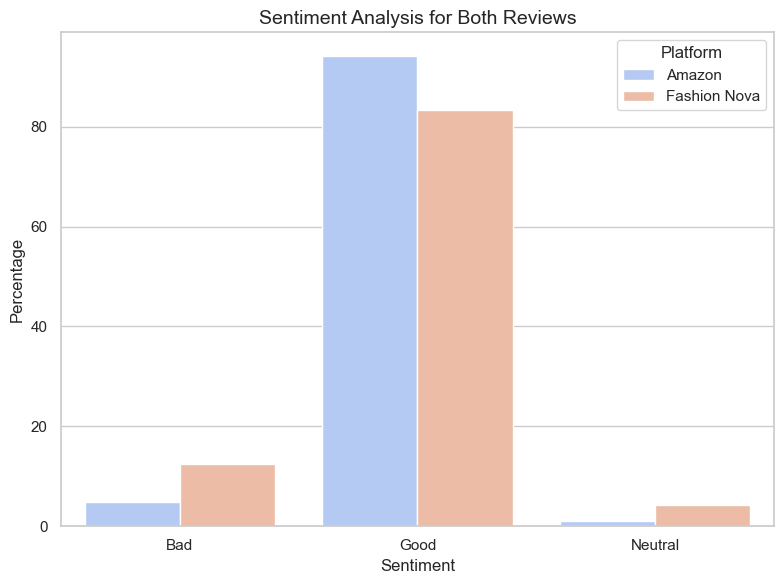

In [57]:
# plot data per type of review in category
def plot_category(category, df):
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")

    # filters through percentages
    category_df = df[df['Category'] == category]

    sns.barplot(data=category_df, x='Processed_Sentiment', y='Percentage', hue='Platform',
                ci=None, palette='coolwarm', dodge=True, hue_order=['Amazon', 'Fashion Nova'])

    plt.title(f'Sentiment Analysis for {category} Reviews', fontsize=14)
    plt.xlabel('Sentiment', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.legend(title='Platform')

    plt.tight_layout()
    plt.show()

# ignores "other" in category
plot_category('Shipping', combined_percentages)
plot_category('Quality', combined_percentages)
plot_category('Both', combined_percentages)


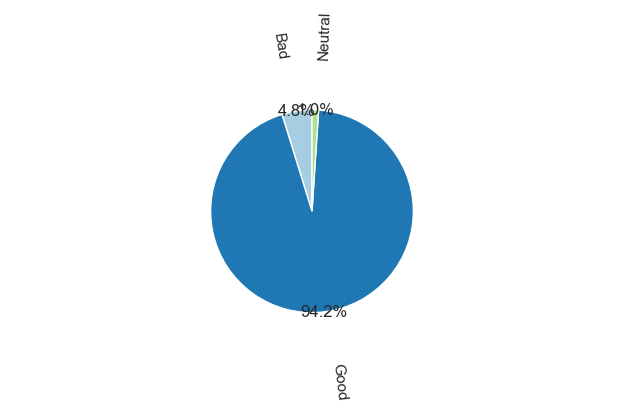

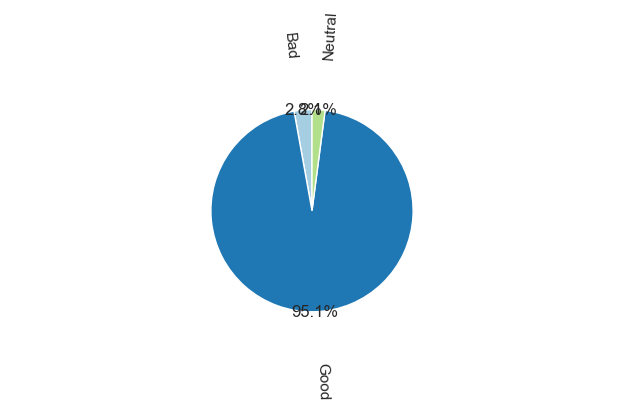

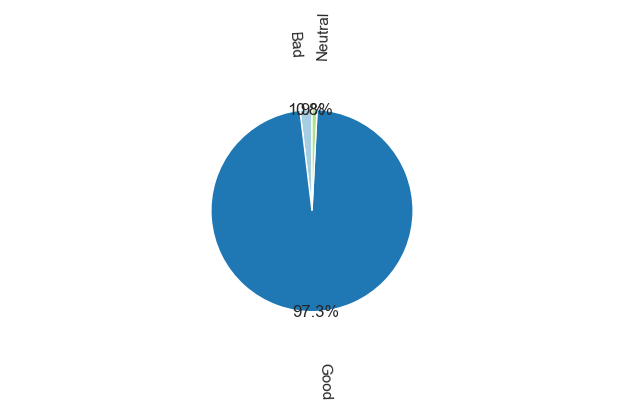

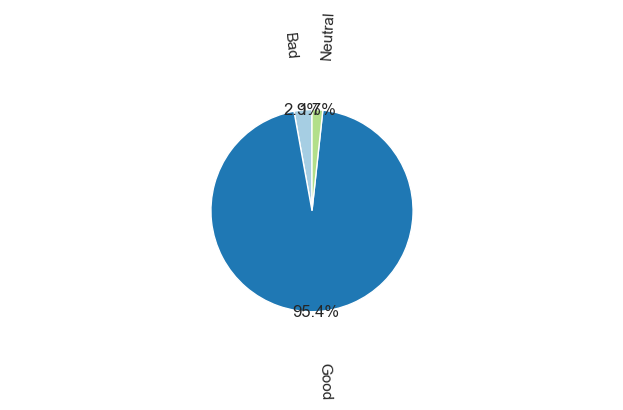

In [55]:
colors = sns.color_palette('Paired')

for category in fashion_nova_percentages['Category'].unique():
    category_data = amazon_percentages[fashion_nova_percentages['Category'] == category]
    sentiment_percentages = category_data.groupby('Processed_Sentiment')['Percentage'].sum()

    # plt.figure(figsize=(6, 6))
    plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=1.0, labeldistance=1.5, rotatelabels=True)
    # plt.title(f'Fashion Nova Sentiment Distribution for {category} Category')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
